## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
combined_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice in the DataFrame.
count = combined_table["Mouse ID"].value_counts()
count

g989    13
a685    10
i901    10
s565    10
m957    10
        ..
t573     1
x226     1
o848     1
h428     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint (help from Steve). 
duplicate_mouse_ids = combined_table.loc[combined_table.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [119]:
# Optional: Get all the data for the duplicate mouse ID (Help from Steve). 
duplicate_mouse_data = combined_table.loc[combined_table["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (Help from Steve).
clean_study_data_complete = combined_table[combined_table['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [121]:
# Checking the number of mice in the clean DataFrame.
count = clean_study_data_complete["Mouse ID"].value_counts()
count

a685    10
m546    10
l725    10
u327    10
q511    10
        ..
h428     1
n482     1
b447     1
u153     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summarystats = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen").count())

summarystats["Mean"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

summarystats = summarystats.rename(columns = {"Mouse ID" : "# of Trials"})

summarystats.head()

,# of Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar Plots

Text(0.5, 1.0, '# of Mice per Drug Regimen')

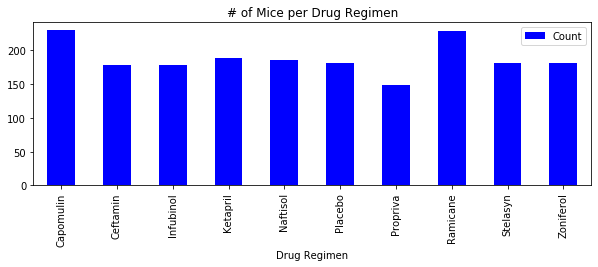

In [85]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
grouped_df = pd.DataFrame(clean_study_data_complete.groupby(["Drug Regimen"]).count()).reset_index()

panda_bar = grouped_df[["Drug Regimen","Mouse ID"]]
panda_bar = panda_bar.rename(columns={"Mouse ID": "Count"})

panda_bar = panda_bar.set_index("Drug Regimen")
panda_bar.plot(kind="bar", color = "b", figsize=(10,3))
plt.title("# of Mice per Drug Regimen")

Text(0.5, 1.0, '# of Mice per Drug Regimen')

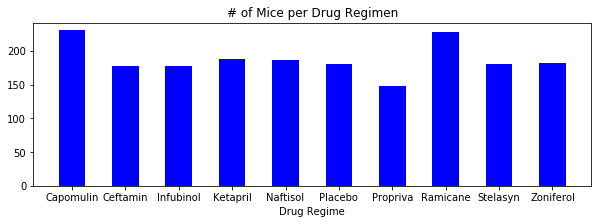

In [98]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot
drug_list = summarystats.index.tolist()
drug_count = (clean_study_data_complete.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
x_axis = np.arange(len(drug_count))
x_axis = drug_list
plt.figure(figsize=(10,3))
plt.bar(x_axis, drug_count, color='b', width=0.5, align="center")
plt.xlabel("Drug Regime")
plt.title("# of Mice per Drug Regimen")

## Pie Plots

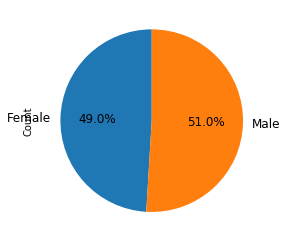

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
panda_pie = pd.DataFrame(clean_study_data_complete.groupby(["Sex"]).count()).reset_index()
panda_pie = panda_pie[["Sex","Mouse ID"]]
panda_pie = panda_pie.rename(columns={"Mouse ID": "Count"})
plt.figure(figsize=(9,9))
ax1 = plt.subplot(121, aspect='equal')
panda_pie.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, labels=panda_pie['Sex'], legend = False, fontsize=12)

([<matplotlib.patches.Wedge at 0x12a34b60f48>,
 [Text(-1.0995024239828841, 0.03308201408261592, 'Female'),
  Text(1.0995024239828841, -0.03308201408261557, 'Male')],
 [Text(-0.5997285948997548, 0.018044734954154134, '49.0%'),
  Text(0.5997285948997549, -0.018044734954153943, '51.0%')])

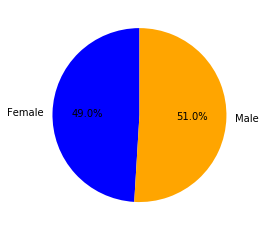

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (clean_study_data_complete.groupby(["Sex"])["Age_months"].count()).tolist()
labels = ["Female", "Male"]
colors = ["blue", "orange"]
explode = (0, 0)
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=90)

## Quartiles, Outliers and Boxplots

In [205]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
top_drugs = clean_study_data_complete[clean_study_data_complete['Drug Regimen'].isin(top_drugs_list)]
last_tumor = top_drugs.groupby(['Drug Regimen']).agg(Last_Tumor_Volume=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(1)
last_tumor

,Last_Tumor_Volume
Drug Regimen,
Capomulin,46.5
Ceftamin,64.7
Infubinol,62.8
Ramicane,44.2


In [206]:
last_tumor_unstack = last_tumor.stack(level=0).unstack(level=0)

counter = 0


for drug in top_drugs_list:
    quartiles = last_tumor_unstack[drug].quantile([.25,.5,.75]).round(3)
    lowerq = quartiles[0.25].round(3)
    upperq = quartiles[0.75].round(3)
    iqr = round(upperq-lowerq,3)
    lower_bound = round(lowerq - (1.5*iqr),3)
    upper_bound = round(upperq + (1.5*iqr),3)
    

    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 46.5
The upper quartile of Capomulin is: 46.5
The interquartile range of Capomulin is: 0.0
The the median of Capomulin is: 46.5 
Values below 46.5 for Capomulin could be outliers.
Values above 46.5 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 44.2
The upper quartile of Ramicane is: 44.2
The interquartile range of Ramicane is: 0.0
The the median of Ramicane is: 44.2 
Values below 44.2 for Ramicane could be outliers.
Values above 44.2 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 62.8
The upper quartile of Infubinol is: 62.8
The interquartile range of Infubinol is: 0.0
The the median of Infubinol is: 62.8 
Values below 62.8 for Infubinol could be outliers.
Values above 62.8

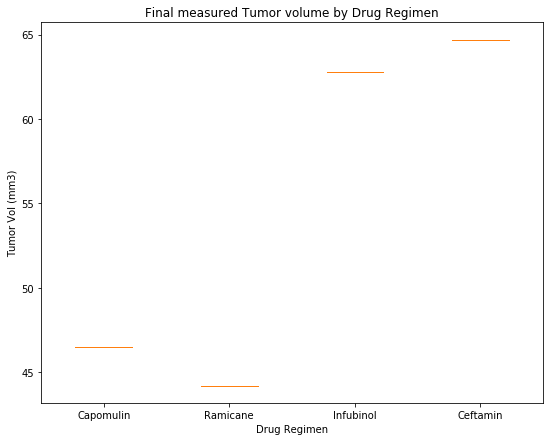

In [201]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in top_drugs_list:
    boxplot_list.append(list(last_tumor_unstack[drug].dropna()))
    
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],top_drugs_list)


plt.show()

## Line and Scatter Plots

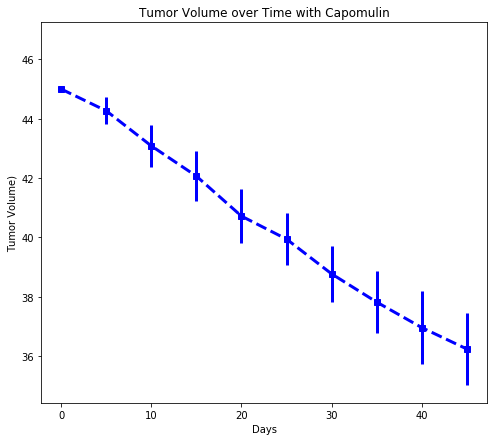

In [218]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == 'Capomulin']

cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

time_series = list(cap_time_tumor.index.values)
plt.errorbar(time_series, cap_time_tumor['Tumor_Vol_Mean'], yerr=cap_time_tumor['Tumor_Vol_SEM'], label="Time Series of Tumor Volume for Capomulin", fmt="bs--", linewidth=3)
plt.title("Tumor Volume over Time with Capomulin")
plt.xlabel("Days")
plt.ylabel("Tumor Volume)")
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]
plt.show()

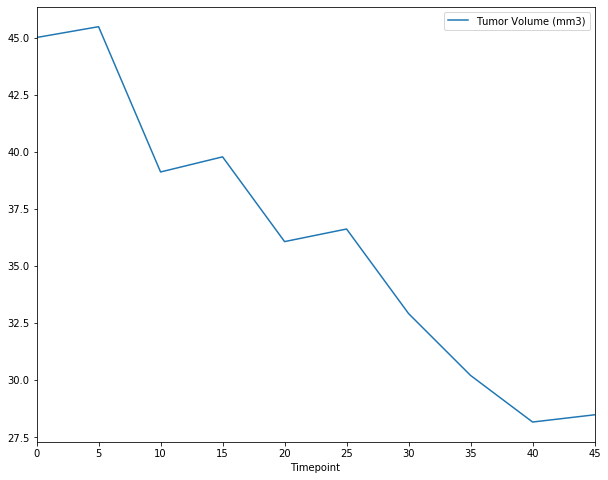

In [227]:
cap_data = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
cap_data = cap_data.reset_index()
cap_x401 = cap_data.loc[cap_data["Mouse ID"] == "x401"]
cap_x401 = cap_x401.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_x401 = cap_x401.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_x401.set_index('Timepoint').plot(figsize=(10, 8))

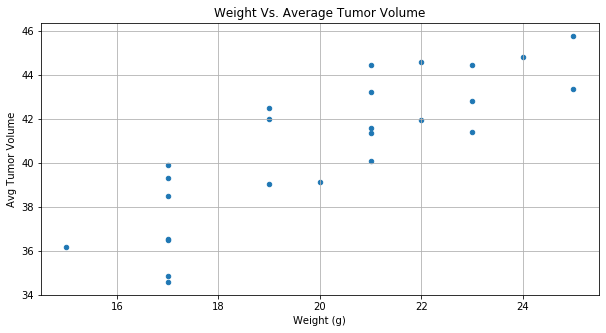

In [234]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_weight = cap_data.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_avg_weight = pd.DataFrame(cap_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
cap_avg_weight = cap_avg_weight.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume"})
cap_avg_weight = cap_avg_weight.set_index('Mouse ID')
cap_avg_weight.plot(kind="scatter", x="Weight (g)", y="Avg Tumor Volume", grid=True, figsize=(10,5),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [236]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = cap_avg_weight.iloc[:,0]
avg_tumor_volume = cap_avg_weight.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation coefficient is {round(correlation[0],2)}")

The correlation coefficient is 0.84


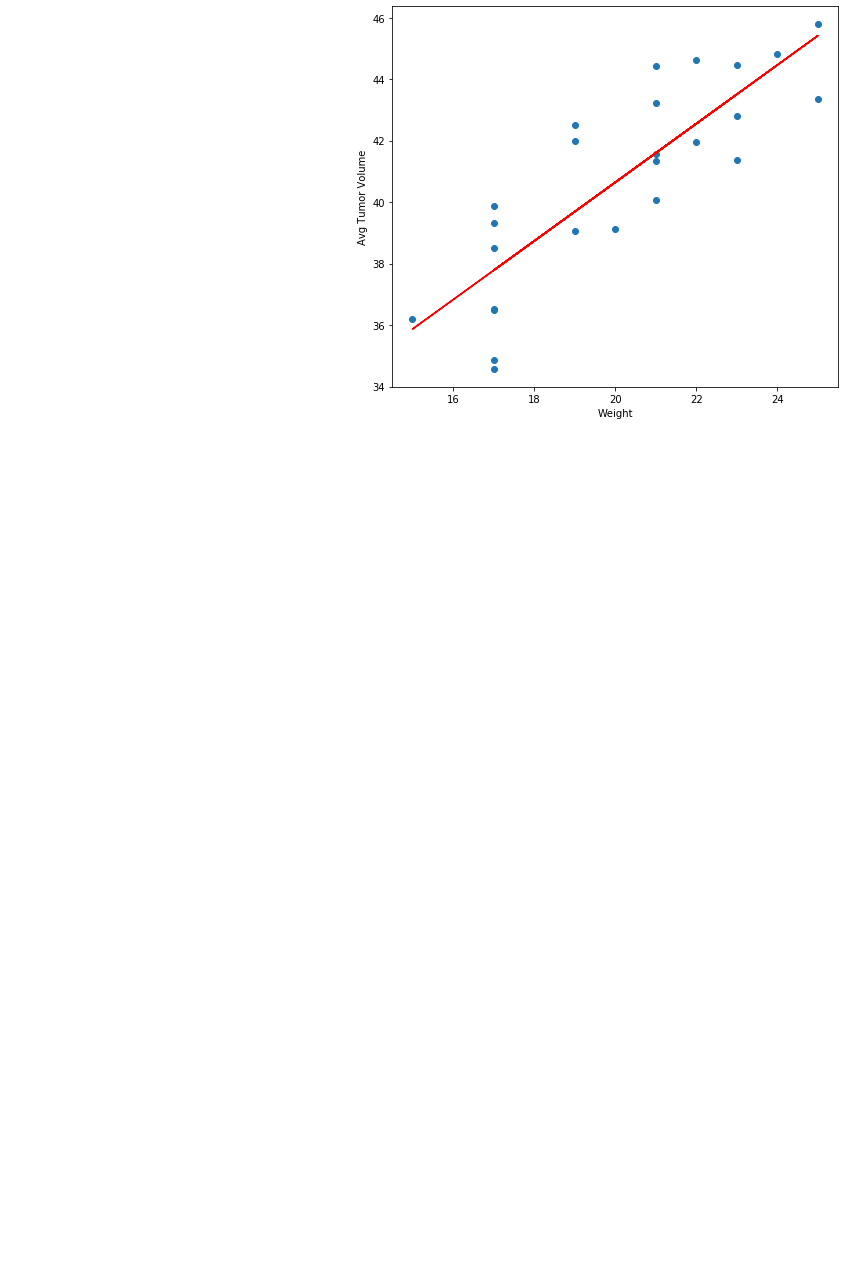

In [245]:
x_values = cap_avg_weight['Weight (g)']
y_values = cap_avg_weight['Avg Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5))
plt.xlabel('Weight')
plt.ylabel('Avg Tumor Volume')
plt.show()

Observations
    1. Near equal split between gender on test speciments.
    2. Weight and Tumor volume show a strong correlation
    3. Noticeable positive results with the drug Capomulin